# Atividade 3

## Redes neurais simples

Na pasta **NNFS** ilustramos o funcionamento básico de uma rede neural e a utilizamos para fazer um treinamento ilustrativo onde a rede neural simplesmente aprendeu a interpolar uma função seno no intervalo de 0 a 2π. Vimos que qualquer tentativa de extrapolação falha.

Em todos os casos, use MSE para a fução de perda (loss), otimizador Adam e funções de ativação `tanh`. Varie o número de camadas ocultas e neurônios por camada para ver como afetam o resultado. 

Há muitos outros parâmetros que podem ser ajustados, como a taxa de aprendizado, número de épocas, batch size, número de pontos. Procure entender o que são estes parâmetros e como afetam os resultados.

Anote tudo que aprender na forma de um relatório informal, mas organizado. Pode ser um arquivo markdown ou um jupyter notebook que serão salvos no seu github. 

### Instruções básicas

Eu vou enviar por email um exemplo de implementação em scikit-learn para vocês explorarem. Façam o mesmo com PyTorch ou TensorFlow.

Treinem a rede neural para interpolar algumas funções e procurem entender como o número de camadas e neurônios afetam o resultado. Lembrem-se que excesso de parâmetros pode levar a overfitting.

Funções de teste para treinar:

- seno, cosseno, tangente no intervalo de 0 a 2π
- função sync(x) = sin(x)/x no intervalo de -10 a 10
- função gaussiana no intervalo de -10 a 10

### Treinar derivadas

Vamos tentar ensinar a rede neural a calcular derivadas numéricas. Para isso, vamos definir um domínio comum de 0 a 2π a fim de depois testar com funções trigonométricas.

Use como input N pontos gerados por polinômios, e como output a sua derivada. Varie a potência p de 0 a 10 ao longo do treinamento.

```python
x = np.random.random(0, 2*np.pi)
x_input  = x ** p
x_output = p * x ** (p-1)
```

Finalizado o treinamento, faça um teste (predict) usando uma função trigonométrica como input e verifique se o output retorna sua derivada!

c:\Users\pf010\AppData\Local\miniconda3\envs\tensorflow-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


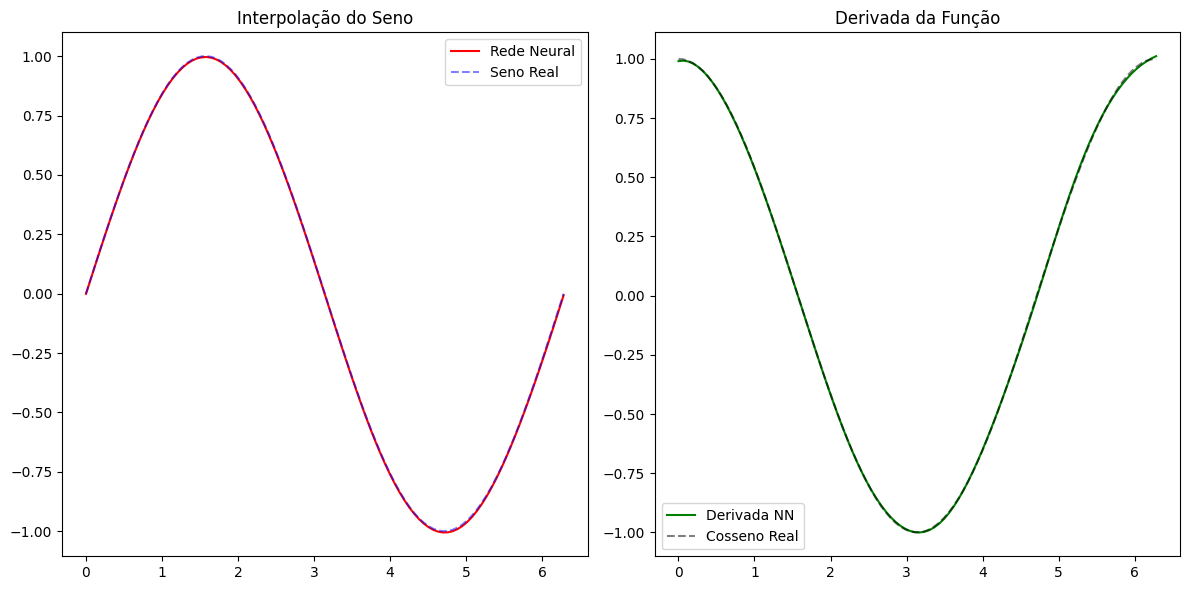

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.api.models import Sequential
from keras.api.layers import Dense

# Gerando os dados de treinamento
# Valores de x vão de 0 a 2*pi, com 1000 pontos
# Inicialmente, x_train é um vetor. Usando reshape(-1, 1) estou transformando em uma matriz coluna de 1000 linhas e 1 coluna.
x_train = np.linspace(0, 2*np.pi, 1000).reshape(-1, 1)
y_train = np.sin(x_train)

# Gerando os dados de teste
# Valores de x vão de 0 a 2*pi, com 200 pontos
# Valores de teste é formado por uma matriz coluna de 200 linhas e 1 coluna.
x_test = np.linspace(0, 2*np.pi, 200).reshape(-1, 1)

# Criando o modelo de rede neural
# Estou usando uma rede neural com 2 camadas ocultas e uma camada de saída.
# As primeiras camadas têm 10 neurônios cada e ambas usam a função de ativação tanh.
# A camada de saída tem 1 neurônio e não usa função de ativação (saída linear).
# O input_shape=(2,) indica que a entrada da rede neural terá duas dimensões.
model = Sequential([
    Dense(10, activation='tanh', input_shape=(2,)),  # Camada oculta 1
    Dense(10, activation='tanh'),                   # Camada oculta 2
    Dense(1)                                       # Saída linear
])

# O compile está configurando o modelo para usar o otimizador adam e a função de perda MSE.
# O otimizador adam é um algoritmo de otimização que ajusta os pesos da rede neural durante o treinamento.
model.compile(optimizer='adam', loss='mse')

# Aqui estou aplicando o modelo nos dados criados anteriormente
# 'epochs' determina o número de iterações (vezes que o código passa pelos dados)
# 'batch_size' o modelo atualiza os pesos a cada valor atrivuído a este parâmetro
# A cada epoch o modelo ajusta os pesos:
# Para cada neurônio na camada oculta há 1 peso (w) e 1 bias (b) (nas duas primeiras camadas ocultas tenho 10 w e 10 b para cada camada).
# 1: o modelo calcula y_pred; 2: calcula o mse; 3: o GD calcula como cada peso contribuiu para o mse e por fim, atualiza os pesos
# 'verbose=0' indica a barra de progresso
history = model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)

# Cálculo da derivada
# Tensorflow atua apenas com tensores, por isso o 'convert_to_tensor'
# 'dtype=tf.float32' garante precisão numérica
# 'GradientTape' funciona como um gravador dos cálculos das derivadas
# 'tape.watch()' funciona com um indicador para gravar os cálculos das derivador de x_tensor
# 'gradient' calcula as derivadas de y_pred em relação a x_tensor (?????)
def compute_derivative(model, x):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        y_pred = model(x_tensor)
    dy_dx = tape.gradient(y_pred, x_tensor)
    return dy_dx.numpy()

# Calcular derivada nos pontos de teste
derivatives = compute_derivative(model, x_test)

# Derivada analítica (cos(x))
true_derivatives = np.cos(x_test)


predictions = model.predict(x_test)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(x_test, predictions, 'r-', label='Rede Neural')
plt.plot(x_test, np.sin(x_test), 'b--', label='Seno Real', alpha=0.5)
plt.title('Interpolação do Seno')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x_test, derivatives, 'g-', label='Derivada NN')
plt.plot(x_test, true_derivatives, 'k--', label='Cosseno Real', alpha=0.5)
plt.title('Derivada da Função')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

layers = 3
neurons = 5
seed = 42
max_epochs = 100000

# Gerar dados de treinamento (x e y = sin(x))
x_train = np.linspace(0, 2 * np.pi, 1000)
y_train = np.sin(x_train)

# Criar o modelo
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # Primeira camada oculta
model.add(Dense(64, activation='relu'))  # Segunda camada oculta
model.add(Dense(1, activation='linear'))  # Saída linear (previsão do seno)

# Compilar o modelo
model.compile(optimizer='adam', loss='mse')

# Treinar o modelo
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Fazer previsões
x_test = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y_pred = model.predict(x_test)

# Plotar resultados
plt.plot(x_test, np.sin(x_test), label='Seno Real', color='blue')
plt.plot(x_test, y_pred, label='Predição da Rede Neural', color='red', linestyle='dashed')
plt.legend()
plt.show()